# EE5175 Lab 8 : Otsu's Thresholding
Author: Kishore Rajendran [EE20B064]

Date: 9 April 2024

In [4]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io

### Otsu's Thresholding

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4310076&tag=1

This is a threshold selection method from gray level histograms based on the discriminatory approach proposed by Nobuyuki Otsu.

It allows us to obtain the globally optimal threshold value that maximizes between-class variance and minimizes in-class variance.

Let the pixels of a given picture be represented in $L$ gray levels. We choose a threshold $t$ such that $0\leq t\leq L-1$ to segment the image into two parts. The $N_1$ samples before $t$ represent one class and the $N_2 = N - N_1$ samples after $t$ represent the second class.

We calculate class-wise $[u_1(t), \sigma_1^2(t)], [u_2(t), \sigma_2^2(t)]$ mean and variance for these samples (which are functions of the threshold value $t$) as:

$$
u_{1}(t) = \sum_{i=0}^t i\frac{F_{i}}{N_{1}}
$$

$$
\sigma_{1}^2(t) = \sum_{i=0}^t (i - u_{1}(t))^2\frac{F_{i}}{N_{1}}
$$

$$
u_{2}(t) = \sum_{i=t+1}^L i\frac{F_{i}}{N_{2}}
$$

$$
\sigma_{2}^2(t) = \sum_{i=t+1}^L (i - u_{2}(t))^2\frac{F_{i}}{N_{2}}
$$

And, the total mean and variance for all the samples (which is independent of the chosen threshold value)$[u_T, \sigma_T^2]$ as:

$$
u_{T} = \sum_{i=0}^L i\frac{F_{i}}{N}
$$

$$
\sigma_{T}^2 = \sum_{i=0}^L (i - u_{T})^2\frac{F_{i}}{N}
$$

Now, we define the within-class variance $\sigma_w^2(t)$ and between-class variance $\sigma_b^2(t)$ as:

$$
\sigma_{w}^2(t) = \sum_{j=1}^2 \sigma_j^2(t)\frac{N_{j}}{N}
$$


$$
\sigma_{b}^2(t) = \sum_{j=1}^2 (u_j(t) - u_{T})^2\frac{N_{j}}{N}
$$

We can show that:

$$
\sigma_{T}^2 = \sigma_{b}^2(t) + \sigma_{w}^2(t)
$$

ie. The within-class variance $\sigma_w^2(t)$ and between-class variance $\sigma_b^2(t)$ sum upto a constant value. So while maximixing $\sigma_b^2(t)$, we simultaneously end up minimizing $\sigma_w^2(t)$ which is what we want!

Thus we pick the optimal value of threshold $t^{*}$ such that:

$$
t^{*} = \argmax_{0\leq t\leq L-1} \sigma_b^2(t)
$$

In [5]:
def otsu(img):
    imgarray = img.reshape([-1])
    N = imgarray.size
    # No. of gray levels
    L = 256
    # Obtaining the gray-level histogram of input image
    count, bins = np.histogram(imgarray, bins=L, range=[0, L])
    # Total mean (ut)
    ut = np.sum([i*count[i] for i in range(L)])/N
    # Initializing the between-class variance and threshold t
    bc_var_max = -1
    thresh = -1
    for t in range(L-1):
        N1 = np.sum(count[:t+1])
        N2 = N - N1
        if N1!=0 and N2!=0:
            u1t = np.sum([i*count[i] for i in range(0, t+1)])/N1
            u2t = np.sum([i*count[i] for i in range(t+1, L)])/N2
            bc_var = (N1*(u1t - ut)**2 + N2*(u2t - ut)**2)/N
            if bc_var >= bc_var_max:
                bc_var_max = bc_var
                thresh = t
    # Generating the thresholded binary images
    thresh_img = np.zeros_like(img)
    thresh_img[img > thresh] = 1
    return count, bins, thresh, thresh_img

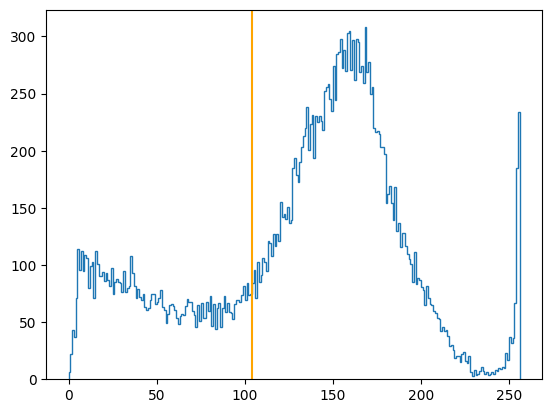

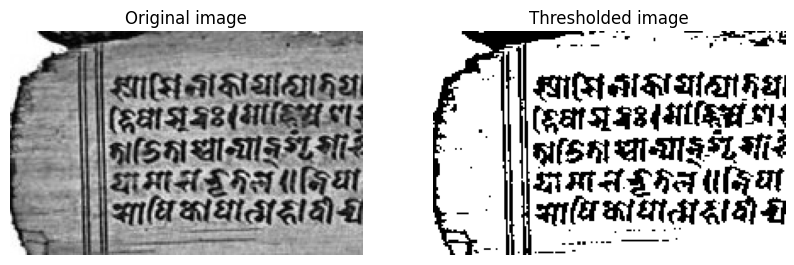

In [6]:
# Importing the image as numpy array
img1 = np.array(Image.open("palmleaf1.png"))

# Generating the binary thresholded image and plotting the histogram with obtained threshold shown
count, bins, thresh, thresh_img1 = otsu(img1)
plt.stairs(count, bins)
plt.axvline(thresh, color = 'orange')

# Plotting the images side by side
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("Original image")
ax[0].axis('off')

ax[1].imshow(thresh_img1, cmap='gray')
ax[1].set_title("Thresholded image")
ax[1].axis('off')

plt.show()

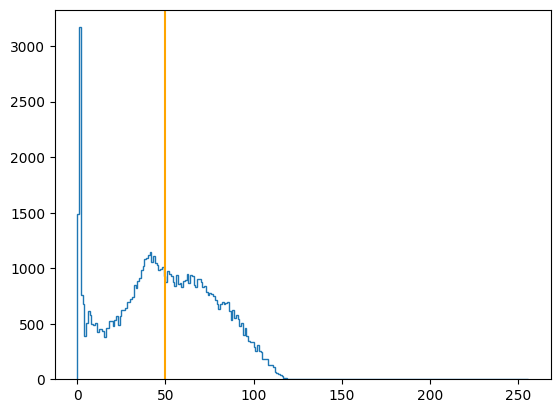

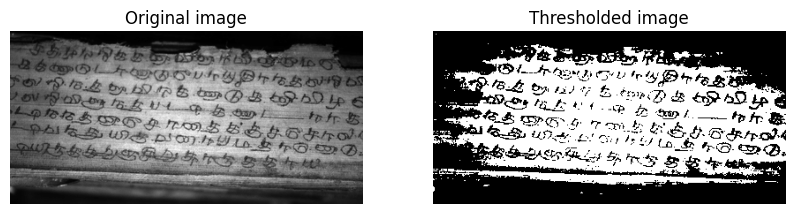

In [7]:
# Importing the image as numpy array
img2 = np.array(Image.open("palmleaf2.png"))

# Generating the binary thresholded image and plotting the histogram with obtained threshold shown
count, bins, thresh, thresh_img2 = otsu(img2)
plt.stairs(count, bins)
plt.axvline(thresh, color = 'orange')

# Plotting the images side by side
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title("Original image")
ax[0].axis('off')

ax[1].imshow(thresh_img2, cmap='gray')
ax[1].set_title("Thresholded image")
ax[1].axis('off')

plt.show()

# Observations
1. The thresholded binary images for both palmleaf1 and palmleaf 2 are quite good at separating the text and the background.
2. However the performance for palmleaf2 is a bit worse off because of the non-uniform illumination levels around the center of the original image itself.
3. This shows that although Otsu provides the optimal global threshold, local adaptive thresholding could be better in some cases.
4. Otsu's thresholding is a very fast and efficient method that also gives us the optimal global threshold value.
5. This method can be extended for multi-thresholding upto 3 classes, after which the criterion $\sigma_{b}^2(t)$ gradually loses its meaning and the exhaustive search requires more time. Thus, for higher dimensions, other methods like K-means are preferred.
